# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : necochea
City not found. Skipping...
Processing Record 2 of Set 1 : santa maria
Processing Record 3 of Set 1 : nikolskoye
Processing Record 4 of Set 1 : qaanaaq
Processing Record 5 of Set 1 : ribeira grande
Processing Record 6 of Set 1 : kapaa
Processing Record 7 of Set 1 : east london
Processing Record 8 of Set 1 : bilibino
Processing Record 9 of Set 1 : shymkent
Processing Record 10 of Set 1 : coquimbo
Processing Record 11 of Set 1 : sitka
Processing Record 12 of Set 1 : busayra
Processing Record 13 of Set 1 : clyde river
Processing Record 14 of Set 1 : yellowknife
Processing Record 15 of Set 1 : assiniboia
Processing Record 16 of Set 1 : saskylakh
Processing Record 17 of Set 1 : shimoda
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 1 : hornepayne
Processing Record 19 of Set 1 : lebu
Processing Record 20 of Set 1 : rapid valley
Processing Record 21 of Set 1 : l

Processing Record 32 of Set 4 : srednekolymsk
Processing Record 33 of Set 4 : lagoa
Processing Record 34 of Set 4 : kavieng
Processing Record 35 of Set 4 : lata
Processing Record 36 of Set 4 : torbay
Processing Record 37 of Set 4 : richards bay
Processing Record 38 of Set 4 : atasu
Processing Record 39 of Set 4 : hamilton
Processing Record 40 of Set 4 : xinzhou
Processing Record 41 of Set 4 : vila velha
Processing Record 42 of Set 4 : bay roberts
Processing Record 43 of Set 4 : tandil
Processing Record 44 of Set 4 : leningradskiy
Processing Record 45 of Set 4 : meadow lake
City not found. Skipping...
Processing Record 46 of Set 4 : kulhudhuffushi
Processing Record 47 of Set 4 : rio claro
Processing Record 48 of Set 4 : kargasok
Processing Record 49 of Set 4 : pordim
Processing Record 50 of Set 4 : ilo
Processing Record 0 of Set 5 : oshawa
Processing Record 1 of Set 5 : sioux lookout
Processing Record 2 of Set 5 : kungurtug
Processing Record 3 of Set 5 : hami
Processing Record 4 of Set 

Processing Record 18 of Set 8 : hervey bay
Processing Record 19 of Set 8 : bethel
Processing Record 20 of Set 8 : mataya
Processing Record 21 of Set 8 : sur
Processing Record 22 of Set 8 : stephenville
Processing Record 23 of Set 8 : orange
Processing Record 24 of Set 8 : seoul
Processing Record 25 of Set 8 : llangefni
Processing Record 26 of Set 8 : brae
Processing Record 27 of Set 8 : evensk
Processing Record 28 of Set 8 : kardla
Processing Record 29 of Set 8 : papara
Processing Record 30 of Set 8 : luorong
City not found. Skipping...
Processing Record 31 of Set 8 : havre
Processing Record 32 of Set 8 : douentza
Processing Record 33 of Set 8 : yumen
Processing Record 34 of Set 8 : margate
Processing Record 35 of Set 8 : adre
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 8 : xuddur
Processing Record 37 of Set 8 : jardim
Processing Record 38 of Set 8 : veraval
Processing Record 39 of Set 8 : samarai
Processing Record 40 of Set 8 : lavrentiya
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a panda data frame using data retrieved
weather_dict = { "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                 "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
                
                
                
               
                
}
weather_df = pd.DataFrame(weather_dict)

In [14]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Necochea,-38.5473,-58.7368,40.03,71,86,20.56,AR,1627346502
1,Santa Maria,-29.6842,-53.8069,63.70,100,90,3.44,BR,1627347028
2,Nikolskoye,59.7035,30.7861,62.49,72,5,4.12,RU,1627346540
3,Qaanaaq,77.4840,-69.3632,42.42,82,100,8.59,GL,1627346592
4,Ribeira Grande,38.5167,-28.7000,70.83,89,94,9.98,PT,1627346549
...,...,...,...,...,...,...,...,...,...
550,Forsytheganj,52.6333,29.7333,66.72,59,86,5.46,BY,1627347167
551,Atar,20.5169,-13.0499,91.04,23,4,3.83,MR,1627347167
552,Banda Aceh,5.5577,95.3222,82.17,77,95,11.79,ID,1627347168
553,Iwanai,42.9744,140.5089,86.14,48,0,3.76,JP,1627346577


In [15]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.00000,555.000000,5.550000e+02
mean,19.154856,16.124036,70.196198,69.754955,52.72973,7.741207,1.627347e+09
std,33.431238,92.401535,13.735902,19.984049,40.80294,5.626612,2.578299e+02
min,-54.800000,-175.200000,33.460000,8.000000,0.00000,0.000000,1.627346e+09
25%,-9.621550,-68.552950,60.765000,57.500000,6.00000,3.690000,1.627347e+09
50%,21.852500,21.850000,71.830000,74.000000,59.00000,6.060000,1.627347e+09
75%,48.194450,99.432600,80.520000,85.500000,97.50000,10.360000,1.627347e+09
max,78.218600,178.416700,100.350000,100.000000,100.00000,36.640000,1.627347e+09


In [16]:
Q1 = 55
Q3 = 85
IQR = Q3 - Q1
LB = Q1-(1.5*IQR)
UB = Q3 +(1.5*IQR)
 
print(f"lower bound is ", LB)
print(f"upper bound is ", UB)

lower bound is  10.0
upper bound is  130.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity  100%. 

In [17]:
# no citites foound with humidity >100

In [18]:
#  Get the indices of cities that have humidity over 100%.
#no citiy with humidity ober 100%

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [20]:
clean_df = weather_df[(np.abs(stats.zscore(weather_df['Humidity'])<3) )]
clean_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Necochea,-38.5473,-58.7368,40.03,71,86,20.56,AR,1627346502
1,Santa Maria,-29.6842,-53.8069,63.70,100,90,3.44,BR,1627347028
2,Nikolskoye,59.7035,30.7861,62.49,72,5,4.12,RU,1627346540
3,Qaanaaq,77.4840,-69.3632,42.42,82,100,8.59,GL,1627346592
4,Ribeira Grande,38.5167,-28.7000,70.83,89,94,9.98,PT,1627346549
...,...,...,...,...,...,...,...,...,...
550,Forsytheganj,52.6333,29.7333,66.72,59,86,5.46,BY,1627347167
551,Atar,20.5169,-13.0499,91.04,23,4,3.83,MR,1627347167
552,Banda Aceh,5.5577,95.3222,82.17,77,95,11.79,ID,1627347168
553,Iwanai,42.9744,140.5089,86.14,48,0,3.76,JP,1627346577


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

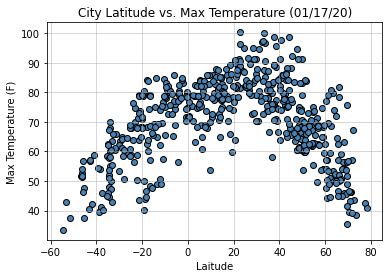

In [21]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig('lat vs temp')
plt.show()

## Latitude vs. Humidity Plot

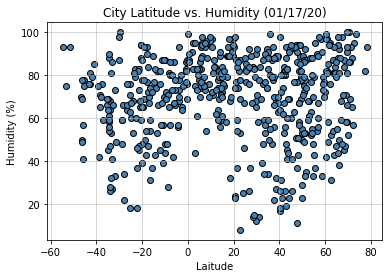

In [22]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(clean_df["Lat"], clean_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Humidity")


In [23]:
#There is no correlation betwwen latitude and humidity

## Latitude vs. Cloudiness Plot

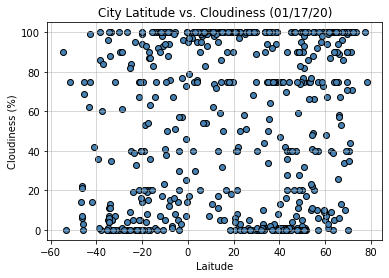

In [24]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(clean_df["Lat"], clean_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Cloudiness")

In [25]:
#no correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

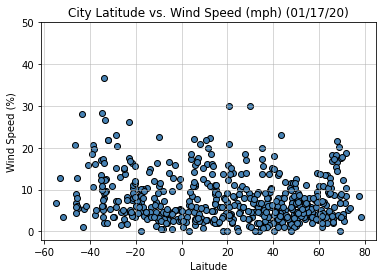

In [26]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(clean_df["Lat"], clean_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Wind Speed (mph)")

In [ ]:
#No correlation betwwen city latitude and wind speed

## Linear Regression

In [27]:
# Create Northern and Southern Hemisphere DataFrames
north = clean_df.loc[clean_df["Lat"] >= 0]
south= clean_df.loc[clean_df["Lat"] < 0]

In [28]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
      

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.61


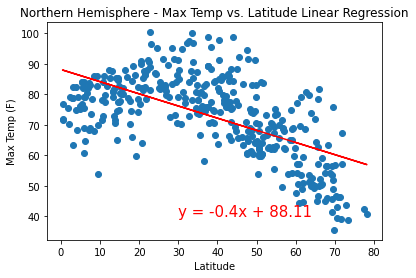

In [30]:
# Call an function #1
equation = linear_agression(north["Lat"], north["Max Temp"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.72


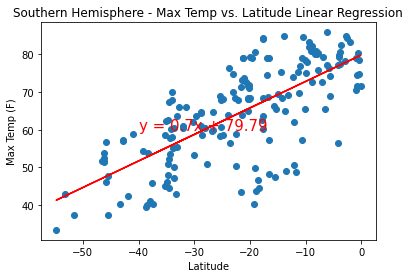

In [31]:
# Call an function #1
equation = linear_agression(south["Lat"], south["Max Temp"])

# Call an function #2
annotate(equation, -40, 60)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

In [ ]:
#Strong positive correlation between souther hemisphere temperature and latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.09


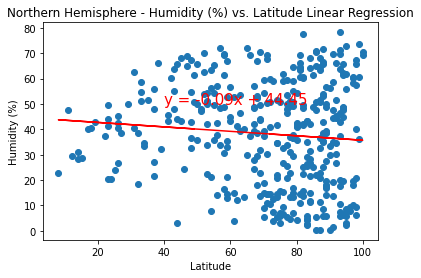

In [32]:
# Call an function #1
equation = linear_agression(north["Humidity"], north["Lat"])

# Call an function #2
annotate(equation, 40, 50)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
#very little to sligthly negative correlation bettwen northern hemisphere humidity and latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.11


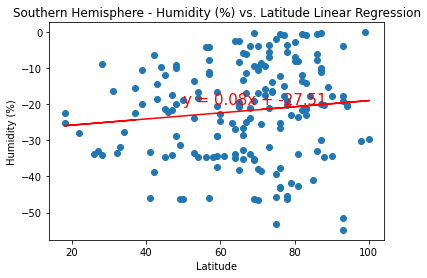

In [33]:
# Call an function #1
equation = linear_agression(south["Humidity"], south["Lat"])

# Call an function #2
annotate(equation, 50, -20)

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

In [ ]:
#very little to sligthly positive correlation bettwen northern hemisphere humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.01


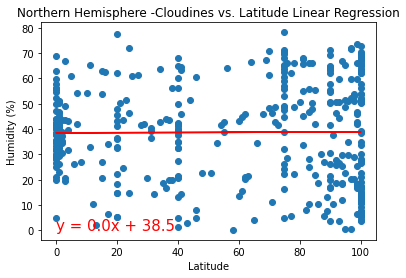

In [45]:
# Call an function #1
equation = linear_agression(north["Cloudiness"], north["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere -Cloudines vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
#zero correlation with cloudiness vs latitude for Norther Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04


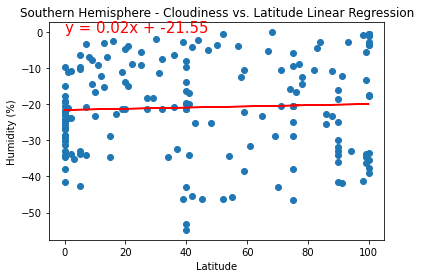

In [48]:
# Call an function #1
equation = linear_agression(south["Cloudiness"], south["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
#zero correlation with cloudiness vs latitude for Norther Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.04


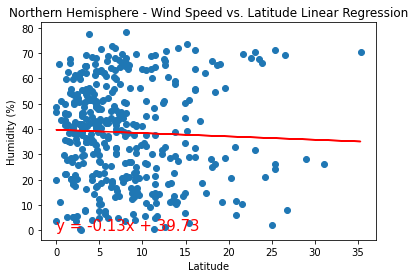

In [50]:
# Call an function #1
equation = linear_agression(north["Wind Speed"], north["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
#slightly negative coorelation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.04


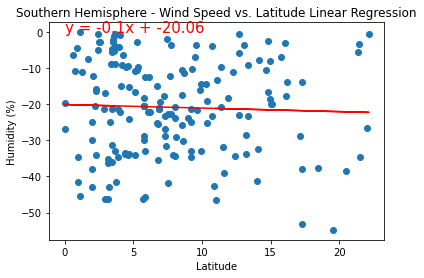

In [51]:
# Call an function #1
equation = linear_agression(south["Wind Speed"], south["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
#slightly negative correlation